# Vamos analisar os suicidios do brasil entre 2014 a 2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dsuicidio2018.csv', encoding='latin-1')
df.head

<bound method NDFrame.head of       estado   ano CIRCOBITO   DTOBITO    DTNASC       SEXO RACACOR  \
0         AC  2014  Suicídio  02-01-14  02-07-77  Masculino   Preta   
1         AC  2014  Suicídio  23-01-14  30-07-66  Masculino  Branca   
2         AC  2014  Suicídio  31-01-14  28-07-43  Masculino  Branca   
3         AC  2014  Suicídio  05-02-14  04-07-99  Masculino  Branca   
4         AC  2014  Suicídio  06-02-14  02-05-72  Masculino  Branca   
...      ...   ...       ...       ...       ...        ...     ...   
58629     TO  2018  Suicídio  16-04-18  17-11-89  Masculino  Branca   
58630     TO  2018  Suicídio  14-05-18  03-07-90   Feminino   Parda   
58631     TO  2018  Suicídio  15-05-18  08-08-55   Feminino   Parda   
58632     TO  2018  Suicídio  24-07-18  27-06-01  Masculino   Parda   
58633     TO  2018  Suicídio  28-12-18  17-07-76  Masculino   Preta   

                 ESTCIV          ESC                             OCUP  \
0                Casado   4 a 7 anos   ATLET

In [3]:
df.dtypes

estado         object
ano             int64
CIRCOBITO      object
DTOBITO        object
DTNASC         object
SEXO           object
RACACOR        object
ESTCIV         object
ESC            object
OCUP           object
CODMUNRES      object
LOCOCOR        object
ASSISTMED      object
CAUSABAS       object
CAUSABAS_O     object
idade         float64
mes             int64
dtype: object

In [4]:
df.isnull().sum()

estado            0
ano               0
CIRCOBITO      2028
DTOBITO           0
DTNASC          227
SEXO             15
RACACOR        1336
ESTCIV         4329
ESC           13472
OCUP              0
CODMUNRES         0
LOCOCOR         171
ASSISTMED     17762
CAUSABAS          0
CAUSABAS_O       90
idade           227
mes               0
dtype: int64

In [5]:
def preprocessamento(df, cols_numericas, cols_categoricas):
    dff = df.copy()
    temp = (df.isnull().sum() / df.shape[0]) >= 0.8
    variaveis_80percFaltantes = temp.loc[temp == True].index.tolist()
    for v in variaveis_80percFaltantes:
        dff = dff.drop(v, axis = 1)
        
    cols_numericas = list(set(cols_numericas).intersection(set(dff.columns.tolist())))
    cols_categoricas = list(set(cols_categoricas).intersection(set(dff.columns.tolist())))
        
    for v in cols_numericas:
        dff[v] = dff[v].fillna(dff[v].mean())
        
    for v in cols_categoricas:
        mode_v = dff[v].value_counts().idxmax()
        dff[v] = dff[v].fillna(mode_v)
    return dff

In [6]:
df = preprocessamento(df = df, 
                            cols_numericas = ['idade'], 
                            cols_categoricas = ['ASSISTMED', 'ESC','RACACOR','ESTCIV','LOCOCOR','SEXO'])

df

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,Solteiro,8 a 11 anos,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,Solteiro,8 a 11 anos,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,8 a 11 anos,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


In [7]:
df = df.dropna(axis=0)
df.isnull().sum()

estado        0
ano           0
CIRCOBITO     0
DTOBITO       0
DTNASC        0
SEXO          0
RACACOR       0
ESTCIV        0
ESC           0
OCUP          0
CODMUNRES     0
LOCOCOR       0
ASSISTMED     0
CAUSABAS      0
CAUSABAS_O    0
idade         0
mes           0
dtype: int64

In [8]:
df.RACACOR.value_counts()
# esse dado se refere Cor das pessoas

Branca      29497
Parda       23100
Preta        2892
Indígena      600
Amarela       229
Name: RACACOR, dtype: int64

In [9]:
df.LOCOCOR.value_counts()
#esse dado se refere ao local onde foi cometido o suicidio.

Domicílio                         35241
Outros                             8838
Hospital                           8019
Via pública                        3335
Outro estabelecimento de saúde      879
6                                     6
Name: LOCOCOR, dtype: int64

In [10]:
df.SEXO.value_counts()
#esse dado se refere ao sexo da pessoa

Masculino    44353
Feminino     11965
Name: SEXO, dtype: int64

In [11]:
df.ano.value_counts()
#esse dado se refere ao ano em que foi cometido o suicidio

2018    12364
2017    11927
2016    10863
2015    10824
2014    10340
Name: ano, dtype: int64

In [12]:
df.estado.value_counts()
#esse dado se refere aos estados com maior numero de óbitos

SP    10525
MG     6725
RS     5993
PR     3701
SC     3288
CE     2919
RJ     2877
BA     2546
GO     2331
PE     1776
PI     1455
MA     1347
PA     1314
MS     1172
AM     1086
PB      993
ES      968
MT      862
RN      845
DF      768
SE      597
AL      565
RO      518
TO      514
AC      254
AP      217
RR      162
Name: estado, dtype: int64

In [13]:
df.idade.value_counts()

33.0     1250
30.0     1228
35.0     1215
31.0     1211
39.0     1203
         ... 
103.0       1
99.0        1
102.0       1
2.0         1
6.0         1
Name: idade, Length: 106, dtype: int64

In [14]:
dfE = df.CODMUNRES.value_counts().head(15)

In [15]:
dfE

São Paulo         1718
Rio de Janeiro    1156
Brasília           768
Belo Horizonte     729
Fortaleza          705
Manaus             524
Porto Alegre       509
Curitiba           474
Goiânia            452
Salvador           381
Teresina           343
Campinas           316
Recife             306
Guarulhos          304
Campo Grande       299
Name: CODMUNRES, dtype: int64

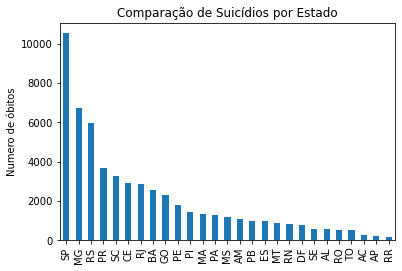

<Figure size 432x288 with 0 Axes>

In [27]:
df['estado'].value_counts().plot.bar()
plt.title('Comparação de Suicídios por Estado')
plt.ylabel('Numero de óbitos')
plt.show()
plt.savefig("Comparação de Suicídios por Estado",dpi=300)

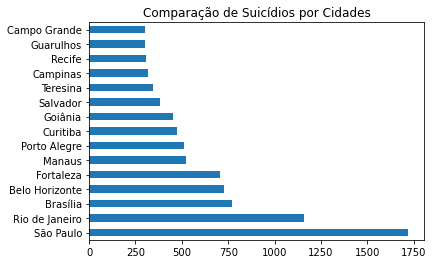

In [29]:
dfE.plot.barh()
plt.title('Comparação de Suicídios por Cidades')
plt.show()

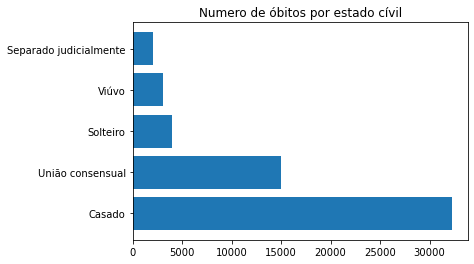

In [18]:
plt.barh(df.ESTCIV.unique(),df.ESTCIV.value_counts())
plt.title('Numero de óbitos por estado cívil')
plt.savefig("Numero de óbitos por estado cívil",dpi=600)

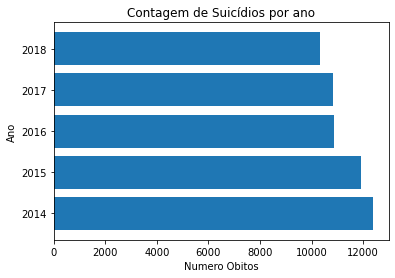

In [19]:
plt.barh(df.ano.unique(),df.ano.value_counts())
plt.title('Contagem de Suicídios por ano')
plt.ylabel('Ano')
plt.xlabel('Numero Obitos')
plt.savefig("Contagem de Suicídios por ano",dpi=300)

/home/douglas/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


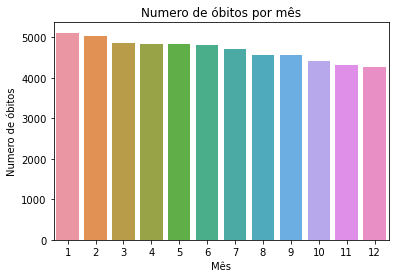

In [20]:
sns.barplot(df.mes.unique(),df.mes.value_counts())
plt.title('Numero de óbitos por mês')
plt.xlabel('Mês')
plt.ylabel('Numero de óbitos')
plt.savefig("Numero de óbitos por mês",dpi=300)

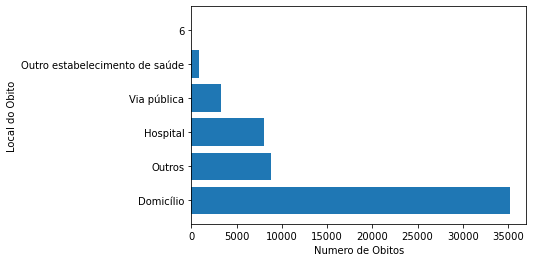

In [21]:
plt.barh(df.LOCOCOR.unique(),df.LOCOCOR.value_counts())
plt.xlabel("Numero de Obitos")
plt.ylabel("Local do Obito")
plt.savefig("Contagem de Suicídios por ano",dpi=300)

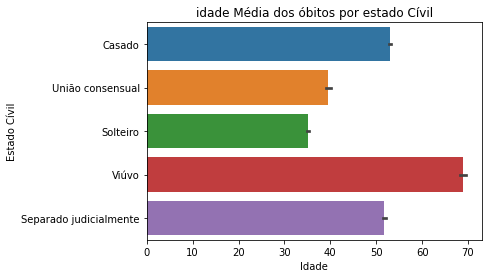

<Figure size 432x288 with 0 Axes>

In [30]:
sns.barplot(x = 'idade', y = 'ESTCIV', data = df)
plt.xlabel('Idade')
plt.ylabel('Estado Cívil')
plt.title('idade Média dos óbitos por estado Cívil')
plt.show()
plt.savefig("idade Média dos óbitos por estado Cívil",dpi=300)

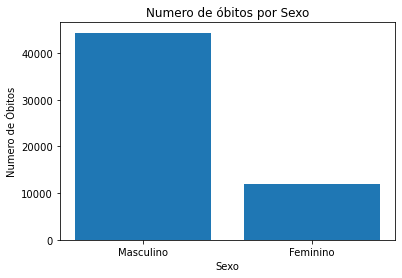

In [23]:
plt.bar(df.SEXO.unique(),df.SEXO.value_counts())
plt.title('Numero de óbitos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Numero de Óbitos')
plt.savefig("Numero de óbitos por Sexo",dpi=300)

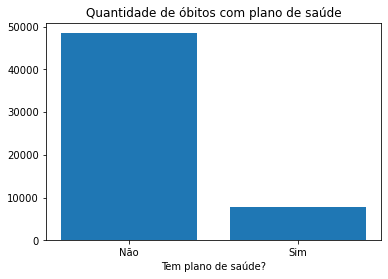

<Figure size 432x288 with 0 Axes>

In [24]:
plt.bar(df.ASSISTMED.unique(),df.ASSISTMED.value_counts())
plt.title('Quantidade de óbitos com plano de saúde')
plt.xlabel('Tem plano de saúde?')
plt.show()
plt.savefig("Quantidade de óbitos com plano de Saúde",dpi=300)

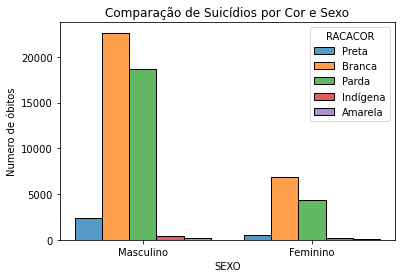

<Figure size 432x288 with 0 Axes>

In [25]:
sns.histplot(df, x="SEXO", hue="RACACOR", multiple="dodge", shrink=.8)
plt.title('Comparação de Suicídios por Cor e Sexo')
plt.ylabel('Numero de óbitos')
plt.show()
plt.savefig("Comparação de Suicídios por Cor e Sexo",dpi=300)